# Sprint 2

### Imports

In [6]:
import numpy as np
from IPython.display import display, HTML

In [7]:
# possible states
D = np.array([1,0,0])
C = np.array([0,1,0])
O = np.array([0,0,1])

states =[D,C,O]

In [8]:
# "classic" probability
w_classic = np.array([[0.8,0.1,0.1],[0.5,0.3,0.2],[0.1,0.7,0.2]])

### Helper functions


In [228]:
def change_state( state, style ):
    '''
    given a state "state" I return the next state
    style = ['classic','random','aggressive'] chooses the transitional matrix
    '''
    # input check
    if style not in ['classic','random','aggressive']:
        print('ERROR: style', style, 'is not accepted')
        return
    if (False in (state == D)) and (False in (state == C)) and (False in (state == O)):
        print('ERROR: state', state, 'is not accepted')
        return
    # actual calculations
    if style == 'classic':
        w = np.array([[0.8,0.1,0.1],[0.5,0.3,0.2],[0.1,0.7,0.2]])
    elif style == 'random':
        w = np.array([[0.2,0.7,0.1],[0,1,0],[0.2,0.7,0.1]])
    else:
        w = np.array([[0.01,0.14,0.85],[0.45,0.2,0.35],[0.01,0.09,0.9]])
    v = w.T.dot(state)
    x = np.random.rand() # random number in [0,1)
    bounds = np.cumsum(v)
    if x <= bounds[0]:
        return D
    elif x <= bounds[1]:
        return C
    else:
        return O

def select_card( state ):
    '''
    given a state "state"
    return a type of card, either "strength" (0) or "action" (1)
    '''
    if (False in (state == D)) and (False in (state == C)) and (False in (state == O)):
        print('ERROR: state', state, 'is not accepted')
        return
    E = np.array([[0.8,0.2],[0.5,0.5],[0.3,0.7]])
    v = E.T.dot(state)
    x = np.random.rand()
    if x <= v[0]:
        return 0
    else:
        return 1
    
def extract_strength():
    x = np.random.rand()
    bounds = [0.6,0.9,1]
    if x < bound[0]:
        return 1
    elif x < bound[1]:
        return 2
    else:
        return 4
    
def extract_action():
    x = np.random.rand()
    if x < 0.9:
        return '0el'
    else:
        return 'Spinat'

In [9]:
start = D
N = 10000
my_states = np.zeros((N, 3))
my_states[0, :] = D

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(N-1):
    my_states[i+1] = change_state( my_states[i], 'aggressive' )

NameError: name 'change_state' is not defined

In [ ]:
prob = [ np.argmax(my_states[i]) for i in range(N)]
plt.hist(prob)
plt.xlim(0,2)
plt.title('Histogram aggressive mode with states (left to right D,C,O)')
plt.savefig('aggressive mode')
#plt.yscale('log')

### Forward Algorithm

The forward algorithm, in the context of a hidden Markov model (HMM), is used to calculate a 'belief state': the probability of a state at a certain time, given the history of evidence. The process is also known as filtering. The forward algorithm is closely related to, but distinct from, the Viterbi algorithm.

### For an HMM such as this one:

In [198]:
display(HTML('''<img src="https://gleis1.ch/wp-content/uploads/2019/03/600px-Hmm_temporal_bayesian_net.svg_.png">'''))

This probability is written as $P(x_t | y_{1:t} )$. Here ${x(t)}$ is the hidden state which is abbreviated as ${x_{t}}$ and ${ y_{1:t}}$ are the observations ${1}$ to ${t}$ t. A belief state can be calculated at each time step, but doing this does not, in a strict sense, produce the most likely state sequence, but rather the most likely state at each time step, given the previous history.

The goal of the forward algorithm is to compute the joint probability $p(x_{t},y_{{1:t}})$, where for notational convenience we have abbreviated ${x(t)}$ as ${ x_{t}}$ and $(y(1),y(2),...,y(t))$ as ${ y_{1:t}}$ Computing $p(x_{t},y_{{1:t}})$directly would require marginalizing over all possible state sequences $\{ x_{ { 1:t-1 } }\} $ , the number of which grows exponentially with ${t}$. Instead, the forward algorithm takes advantage of the conditional independence rules of the hidden Markov model (HMM) to perform the calculation recursively.

to demostrate the recursion, let <br>
$\alpha _{t}(x_{t})=p(x_{t},y_{{1:t}})=\sum _{{x_{{t-1}}}}p(x_{t},x_{{t-1}},y_{{1:t}})$
<br> <br>
Using the cahin rule to expand $p(x_{t},x_{{t-1}},y_{{1:t}})$, we can write <br>
$\alpha _{t}(x_{t})=\sum _{{x_{{t-1}}}}p(y_{t}|x_{t},x_{{t-1}},y_{{1:t-1}})p(x_{t}|x_{{t-1}},y_{{1:t-1}})p(x_{{t-1}},y_{{1:t-1}})$   <br><br>
Because ${y_{t}}$  is conditionally independent of everything but ${x_{t}}$, and ${x_{t}}$ is conditionally independent of everything but ${x_{t-1}}$, this simplifies to <br>
$\alpha _{ t }(x_{ t })=p(y_{ t }|x_{ t })\sum _{ { x_{ { t-1 } } } } p(x_{ t }|x_{ { t-1 } })\alpha _{ { t-1 } }(x_{ { t-1 } })$ <br><br>
Thus, since ${p(y_{t}|x_{t})}$ ) and ${p(x_{t}|x_{t-1})}$  are given by the model's emission distributions and transition probabilities, one can quickly calculate ${\alpha _{t}(x_{t})}$ from ${\alpha _{t-1}(x_{t-1})}$ and avoid incurring exponential computation time.



***
### Source: Wikipedia 
<a href="https://en.wikipedia.org/wiki/Forward_algorithm"> link</a>


In [42]:
w = np.array([[0.8,0.1,0.1],[0.5,0.3,0.2],[0.1,0.7,0.2]]) # transitional probability classic
#w = np.array([[0.2,0.7,0.1],[0,1,0],[0.2,0.7,0.1]]) # random
#w = np.array([[0.01,0.14,0.85],[0.45,0.2,0.35],[0.01,0.09,0.9]]) # aggressive
E = np.array([[0.8,0.2],[0.5,0.5],[0.3,0.7]]) # Extraction probabiility

N = 40
X = [D,C,O]
x_t = np.zeros((N,3,3))
x_t[0,:,:] = X
for i in range(N-1):
    x_t[i+1,:,:] = w.T.dot(x_t[i,:,:])

In [20]:
x_t[500]

array([[0.63636364, 0.63636364, 0.63636364],
       [0.22727273, 0.22727273, 0.22727273],
       [0.13636364, 0.13636364, 0.13636364]])

In [27]:
p = E.T.dot(x_t)
p.shape

(2, 1000, 3)

In [64]:
#p('strength'|x_t)
p = [ E.T.dot(x_t)[np.random.randint(0,1)] for i in range(N)]
alpha_t = E[:,0] 
alphas = np.zeros((N,3))
alphas[0] = alpha_t
for i in range(N-1):
    alphas[i+1] = p[i+1][3]*(w.dot(alphas[i]))


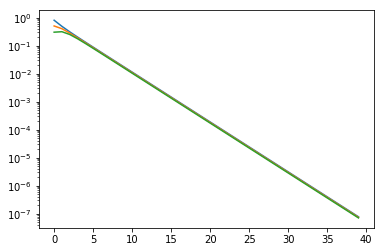

In [65]:
plt.plot(alphas)
plt.yscale('log')

In [221]:
alphas

array([[0.8      , 0.5      , 0.3      ],
       [0.576    , 0.305    , 0.147    ],
       [0.4048   , 0.20445  , 0.09015  ],
       [0.28264  , 0.1408825, 0.0604875]])

In [222]:
alphas_sum = np.sum(alphas, axis=1)
# Y = 4
print(alphas_sum[3]) # last element in the chain 

0.4840100000000003


In [174]:

#plt.plot(alphas)
# plt.yscale('log')
#plt.title('probability of inner state strength') # beeing in a state D if extracted a strength card
# plt.savefig('probability of inner state strength N= 100') # the longer you wait, the lesser the probability

In [214]:
#p('action'|x_t)
p = [ E.T.dot(x_t)[np.random.randint(0,1)] for i in range(N)]
alpha_t = E[:,1] 
alphas = np.zeros((N,3))
alphas[0] = alpha_t
for i in range(N-1):
    alphas[i+1] = p[i+1][0]*(w.dot(alphas[i]))

In [215]:
alphas_sum = np.sum(alphas, axis=1)

print(alphas_sum[3]) # last element in the chain 

0.1518362198


In [209]:
#plt.plot(alphas_sum,Y,'+')
#plt.hist(alphas_sum)
#plt.plot(alphas)
#plt.yscale('log')
#plt.title('probability of inner state action') # beeing in a state D if extracted a strength card
#plt.savefig('probability of inner state action N= 100') # the longer you wait, the lesser the probability

### Viterbi Algorithm

The Viterbi algorithm is a dynamic programming algorithm for finding the most likely sequence of hidden states—called the Viterbi path—that results in a sequence of observed events, especially in the context of Markov information sources and hidden Markov models.

The algorithm has found universal application in decoding the convolutional codes used in both CDMA and GSM digital cellular, dial-up modems, satellite, deep-space communications, and 802.11 wireless LANs. It is now also commonly used in speech recognition, speech synthesis, diarization, keyword spotting, computational linguistics, and bioinformatics. For example, in speech-to-text (speech recognition), the acoustic signal is treated as the observed sequence of events, and a string of text is considered to be the "hidden cause" of the acoustic signal. The Viterbi algorithm finds the most likely string of text given the acoustic signal.


#### INPUT
* the observation space $O=\{o_{1},o_{2},\dots ,o_{N}\}$ <br>
* the state space $S=\{s_{1},s_{2},\dots ,s_{K}\}$
* an array of initial probabilities ${\displaystyle \Pi =(\pi _{1},\pi _{2},\dots ,\pi _{K})} $ such that ${\displaystyle \pi _{i}} $ stores the probability that $x_{1}==s_{i}$
* a sequence of observations ${\displaystyle Y=(y_{1},y_{2},\ldots ,y_{T})} $ such that $y_{t}==i$ if the observation at time ${t}$ is $o_{i}$
* transition matrix ${A}$ of size $ K\times K $ such that $A_{ij}$stores the transition probability of transiting from state $s_{i} $ to state $s_{j} $.
* emission matrix ${B}$ of size $ K\times N  $ such that $B_{ij}$ stores the probability of observing $o_{j} $ from state $s_{i} $.
<br> <br>

#### OUTPUT
* The most likely hidden state sequence ${\displaystyle X=(x_{1},x_{2},\ldots ,x_{N})}$

<br>

### Pseudocode:


In [195]:
display(HTML('''<img src="https://gleis1.ch/wp-content/uploads/2019/03/Pseudocode-viterbi.png">'''))

***
### Source: Wikipedia 
<a href="https://en.wikipedia.org/wiki/Viterbi_algorithm"> link</a>

In [67]:
alpha_t = np.zeros((N,3))
#alpha_t[0,:] = [0.2,0.5,0.7] # P(action|x_t[0])
alpha_t[0,:] = [0.8,0.5,0.1] # P(strength|x_t[0])

In [90]:
#w = np.array([[0.8,0.1,0.1],[0.5,0.3,0.2],[0.1,0.7,0.2]]) # classic
#w = np.array([[0.2,0.7,0.1],[0,1,0],[0.2,0.7,0.1]]) # random
w = np.array([[0.01,0.14,0.85],[0.45,0.2,0.35],[0.01,0.09,0.9]]) # aggressive
T = 10 # length of the path
K = 3 # number of possible states
y = [ int( np.random.rand()*2) for i in range(T) ]
x = np.zeros((T,3))
t1 = np.zeros((K,T))
t2 = np.zeros((K,T),dtype=int)
for j in range(K):
    t1[j,0] = states[j].dot(E[:,y[0]])
for i in range(1,T):
    for j in range(K):
        t1[j,i] = np.max([ t1[k,i-1]* w[k,j]*(E[j,y[i]]) for k in range(K) ])
        t2[j,i] = int(np.argmax([ t1[k,i-1]* w[k,j]*(E[j,y[i]]) for k in range(K) ]))

In [91]:
z = np.argmax(t1[:,T-1])
x[T-1] = states[z]

In [92]:
t2

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 2, 2, 2, 2, 2, 2, 2, 2]])

In [93]:
for i in range(T-2,-1,-1):
    z = t2[z,i+1]
    x[i] = states[z]
print(states) 
print(x)

[array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1])]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [305]:
#plt.plot(x)
# plt.xscale('log')
#plt.title('Aggressive mode, action "Viterbi"') # beeing in a state D if extracted a strength card
#plt.savefig('Agressive mode, action Viterbi T = 10') # the longer the time, the lesser the probability

In [306]:
print('classic mode & strength card: \n')
print(x) # print the highest probable state depening on the play type
#print('\n')
print('\nSequence')
print(y) # sequence


classic mode & strength card: 

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]

Sequence
[1, 1, 1, 0, 1, 0, 1, 0, 0, 1]


### Baum Welch Algorithm

A hidden Markov model describes the joint probability of a collection of "hidden" and observed discrete random variables. It relies on the assumption that the i-th hidden variable given the (i − 1)-th hidden variable is independent of previous hidden variables, and the current observation variables depend only on the current hidden state.

The Baum–Welch algorithm uses the well known EM algorithm to find the maximum likelihood estimate of the parameters of a hidden Markov model given a set of observed feature vectors.


#### Forward procedure:

Let ${\displaystyle \alpha _{i}(t)=P(Y_{1}=y_{1},...,Y_{t}=y_{t},X_{t}=i|\theta )} \alpha _{i}(t)=P(Y_{1}=y_{1},...,Y_{t}=y_{t},X_{t}=i|\theta )$, the probability of seeing the $y_{1},y_{2},...,y_{t}$ in state ${i}$ at time ${t}$. This is found recursively:

1. ${\displaystyle \alpha _{i}(1)=\pi _{i}b_{i}(y_{1}),}$
2. ${\displaystyle \alpha _{i}(t+1)=b_{i}(y_{t+1})\sum _{j=1}^{N}\alpha _{j}(t)a_{ji}.}$


#### Backward procedure:

Let $\beta _{ i }(t)=P(Y_{ t+1 }=y_{ t+1 },...,Y_{ T }=y_{ T }|X_{ t }=i,\theta )$, that is the probability of  the ending partial sequence $y_{t+1},...,y_{T}$ given starting state ${i}$ at time ${t}$. We calculate $ \beta _{i}(t)$ as,
1. ${ \beta _{ i }(T)=1, }$
2. $ \beta _{ i }(t)=\sum _{ j=1 }^{ N } \beta _{ j }(t+1)a_{ ij }b_{ j }(y_{ t+1 }). $


#### Update

We can now calculate the temporary variables, according to Bayes' theorem:

${\displaystyle \gamma _{i}(t)=P(X_{t}=i|Y,\theta )={\frac {P(X_{t}=i,Y|\theta )}{P(Y|\theta )}}={\frac {\alpha _{i}(t)\beta _{i}(t)}{\sum _{j=1}^{N}\alpha _{j}(t)\beta _{j}(t)}},}$

which is the probability of being in state ${i}$ at time ${t}$ given the observed sequence ${Y}$ and the parameters $\theta $ 

${\displaystyle \xi _{ij}(t)=P(X_{t}=i,X_{t+1}=j|Y,\theta )={\frac {P(X_{t}=i,X_{t+1}=j,Y|\theta )}{P(Y|\theta )}}={\frac {\alpha _{i}(t)a_{ij}\beta _{j}(t+1)b_{j}(y_{t+1})}{\sum _{i=1}^{N}\sum _{j=1}^{N}\alpha _{i}(t)a_{ij}\beta _{j}(t+1)b_{j}(y_{t+1})}},}$

which is the probability of being in state ${i}$ and ${j}$ at times ${t}$ and ${t+1}$ respectively given the observed sequence ${Y}$ and parameters $\theta$.

The denominators of ${ \gamma _{ i }(t)}$ and ${ \xi _{ ij }(t) } $ are the same; they represent the probability of making the observation ${Y}$ given the parameters $\theta$.

The parameters of the hidden Markov model $\theta$  can now be updated:

* ${\displaystyle \pi _{i}^{*}=\gamma _{i}(1),}$ <br>

which is the expected frequency spent in state ${i}$ at time ${1}$.

* ${ \pi _{ i }^{ * }=\gamma _{ i }(1){\displaystyle a_{ij}^{*}={\frac {\sum _{t=1}^{T-1}\xi _{ij}(t)}{\sum _{t=1}^{T-1}\gamma _{i}(t)}},} }$

which is the expected number of transitions from state ${i}$ to state ${j}$ compared to the expected total number of transitions away from state i. To clarify, the number of transitions away from state i does not mean transitions to a different state j, but to any state including itself. This is equivalent to the number of times state i is observed in the sequence from ${t = 1}$ to ${t = T − 1}$.

* ${\displaystyle b_{i}^{*}(v_{k})={\frac {\sum _{t=1}^{T}1_{y_{t}=v_{k}}\gamma _{i}(t)}{\sum _{t=1}^{T}\gamma _{i}(t)}},}$ <br>
where <br>

${\displaystyle 1_{y_{t}=v_{k}}={\begin{cases}1&{\text{if }}y_{t}=v_{k},\\0&{\text{otherwise}}\\\end{cases}}}$

is an indicator function, and ${b_{i}^{*}(v_{k})} b_{i}^{*}(v_{k})$ is the expected number of times the output observations have been equal to ${ v_{k}}$ while in state ${i}$ over the expected total number of times in state ${i}$.

These steps are now repeated iteratively until a desired level of convergence.

<b>Note:</b> It is possible to over-fit a particular data set. That is,${\displaystyle P(Y|\theta _{\text{final}})>P(Y|\theta _{\text{true}})}$. The algorithm also does <b>not</b>  guarantee a global maximum.

***
### Source: Wikipedia 

<a href="https://en.wikipedia.org/wiki/Baum%E2%80%93Welch_algorithm"> link</a>

In [20]:
y = [0,1,1,1,0,0] # SEQUENCE OBTAINED BY CLASSIC W
T = len(y)
# initial guess
w_0 = np.random.rand(3,3)
for i in range(3):
    w_0[i,:] = w_0[i,:]/sum(w_0[i,:])
e_0 = np.random.rand(3,2)
for i in range(3):
    e_0[i,:] = e_0[i,:]/sum(e_0[i,:])
pi_0 = np.random.rand(3,1)
pi_0 /= sum(pi_0)

In [25]:
'''first step'''
#pi=pi_0
#b = e_0
#a = w_0
def step_Baum_Welch(y, pi,a,b ):
    T = len(y)
    alphas = np.zeros((T,3))
    alphas[0] = pi.T*(b[:,y[0]])
    for t in range(0,T-1):
        for i in range(3):
            alphas[t+1,i] = b[i,y[t+1]]*( alphas[t].dot(a[:,i]) )
    betas = np.zeros((T,3))
    betas[-1] = 1.
    for t in range(T-2,-1,-1):
        for i in range(3):
            betas[t,i] =  betas[t+1,i]*a[i,:].dot(b[:,y[t]]) 
    gammas = np.zeros((T,3))
    for t in range(0,T):
        for i in range(3):
            gammas[t,i] = (alphas[t,i]*betas[t,i])/(alphas[t].dot(betas[t]))
    xi = np.zeros((T,3,3))
    for t in range(0,T-1):
        den = 0
        for i in range(3):
            for j in range(3):
                den += alphas[t,i]*a[i,j]*betas[t+1,j]*(b[j,y[t+1]])
        for i in range(3):
            for j in range(3):
                xi[t,i,j] = (alphas[t,i]*a[i,j]*betas[t+1,j]*b[j,y[t+1]])/den
    newpi = gammas[0]
    #print(xi[2])
    newa = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            newa[i,j] = np.sum(xi[:,i,j])/np.sum(gammas[:,i])
    newb = np.zeros((3,2))
    for i in range(3):
        newb[i,:] = [ -(1-np.array(y)).dot(gammas[:,i]) , np.array(y).dot(gammas[:,i])]/np.sum(gammas[:,i])
    return newpi, newa, newb

In [26]:
pi,a,b = step_Baum_Welch(y, pi_0,w_0,e_0 )

In [27]:
value = []
for i in range(200):
    value.append(a[0,0])
    pi,a,b = step_Baum_Welch(y, pi,a,b )

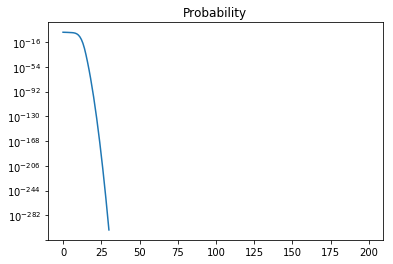

In [34]:
plt.plot(value)
plt.title('Probability')
plt.yscale('log')
plt.savefig('Welch Baum')

In [29]:
a

array([[0.00000000e+000, 1.02088003e+000, 0.00000000e+000],
       [4.45685955e-198, 6.60789184e-001, 3.22369859e-001],
       [1.51787365e-002, 3.99924626e-299, 4.82323144e-001]])